In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ratings_Electronics.csv', header = None, names = ['userID','productID','ratings','timestamp'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userID       object
productID    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [4]:
data.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
data = data.drop('timestamp', axis = 1)
data.head()

,userID,productID,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userID       object
productID    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


### The column on timestamp has been dropped

In [7]:
data.shape

(7824482, 3)

In [9]:
pip install plotly

     |████████████████████████████████| 7.3MB 95kB/s eta 0:00:013
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=67dde0c68f90596c6294e0aa2505717c173c12928b066825b46accb3cfa551d9
  Stored in directory: /Users/abhinandanchiney/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [10]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data_1 = data['ratings'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data_1.index,
               text = ['{:.1f} %'.format(val) for val in (data_1.values / data.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data_1.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} book-ratings'.format(data.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### We see that most of those he ratings are 5. Some are 4. A lot of the ratings are also 1. 

In [15]:
top_10_prod = data.groupby('productID')['ratings'].count().reset_index().sort_values('ratings', ascending=False)[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

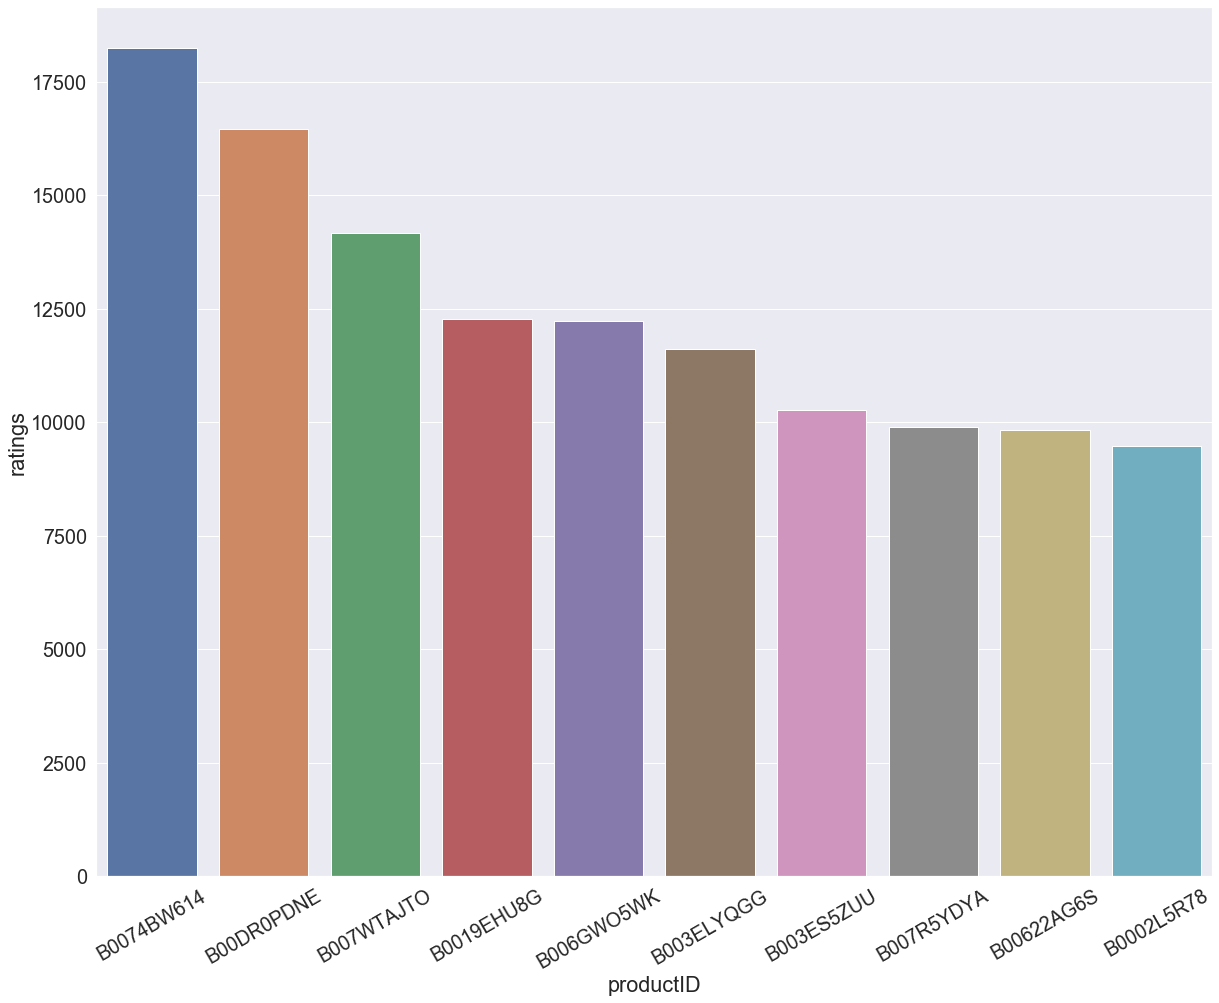

In [16]:
sns.set(font_scale=1.8)
fig, ax = plt.subplots(figsize=(20,16))
sns.barplot(x = 'productID', y = 'ratings', data = top_10_prod)
plt.xticks(rotation=30)

### The above plot shows those products which have been rated the most number of times

In [17]:
top_10_user = data.groupby('userID')['ratings'].count().reset_index().sort_values('ratings', ascending=False)[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

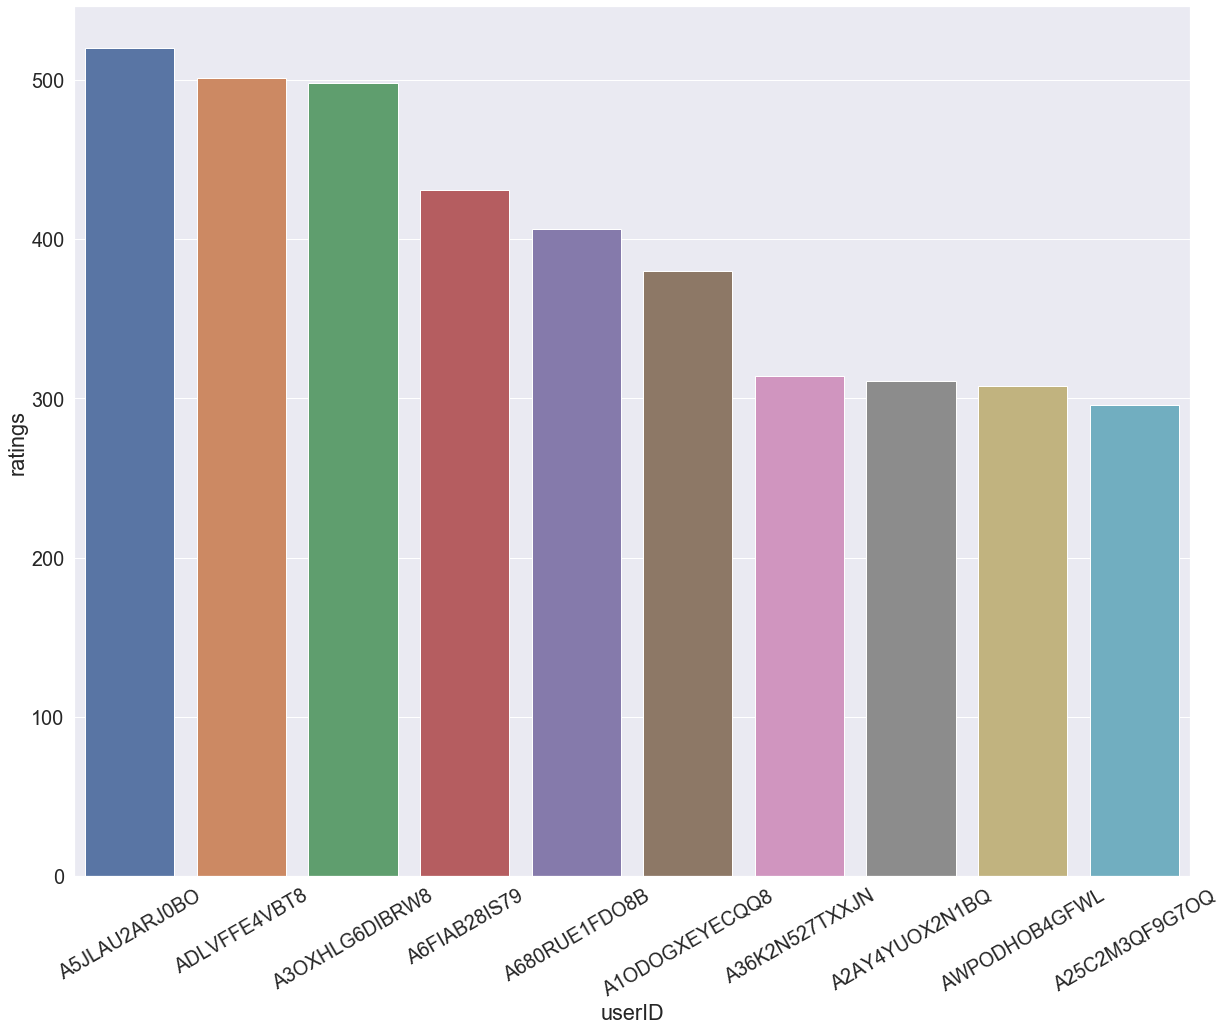

In [18]:
sns.set(font_scale=1.8)
fig, ax = plt.subplots(figsize=(20,16))
sns.barplot(x = 'userID', y = 'ratings', data = top_10_user)
plt.xticks(rotation=30)

### the above plot shows the uses who have put in the most number of reviews

In [19]:
counts_user= data['userID'].value_counts()

In [20]:
data_new = data[data.userID.isin(counts_user[counts_user>=50].index)]
data_new.shape

(125871, 3)

### The new data set contains only those users who have put in more than 50 ratings

In [21]:
init_notebook_mode(connected=True)

data_1 = data_new['ratings'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data_1.index,
               text = ['{:.1f} %'.format(val) for val in (data_1.values / data_new.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data_1.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} book-ratings'.format(data_new.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Despite the reduction, the proportions of the various ratings do not change much. Some 1 rating reviews are lost

In [22]:
data_new.groupby('productID')['ratings'].mean().head()  

productID
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [23]:
data_new.groupby('productID')['ratings'].mean().sort_values(ascending=False).head()  

productID
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [24]:
data_new.groupby('productID')['ratings'].count().sort_values(ascending=False).head()  

productID
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [25]:
ratings_mean_count = pd.DataFrame(data_new.groupby('productID')['ratings'].mean()) 

In [26]:
ratings_mean_count['rating_counts'] = pd.DataFrame(data_new.groupby('productID')['ratings'].count())  

In [27]:
top_pop = ratings_mean_count.sort_values(by='rating_counts', ascending=False).head(5)

In [28]:
top_pop

,ratings,rating_counts
productID,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


#### The above table shows the top 5 popularity based recomendations for all users. This will be used for new users. 

In [22]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import SVD
from surprise import SVDpp

In [23]:
data_new.columns

Index(['userID', 'productID', 'ratings'], dtype='object')

In [24]:
data_new = data_new.sample(frac = 0.1)

In [25]:
reader = Reader(rating_scale=(1,5))
data_new_item = Dataset.load_from_df(data_new[['userID', 'productID', 'ratings']], reader)
trainset, testset = train_test_split(data_new_item, test_size=.3)

In [26]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [27]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [28]:
test_pred

[Prediction(uid='A1F0KPA232MTYC', iid='B005ERK3OC', r_ui=5.0, est=4.274460839954597, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AB094YABX21WQ', iid='B004PYD9I2', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3LWC833HQIG7J', iid='B00009R6JT', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2Z2MUP8JRJXEU', iid='B00JGGUBPI', r_ui=5.0, est=4.274460839954597, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A13QOK3SKIT9QL', iid='B000EWJYYW', r_ui=5.0, est=4.274460839954597, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A19HT7YC1UW3D6', iid='B003LRY9Q0', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ATFBVUXDIRXT6', iid='B0017K4CII', r_ui=4.0, est=4.274460839954597, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'

In [29]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)
rmse_item_item = accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.0890
RMSE: 1.0890


### The RMSE for item item collabartive model is 1.089 which is high considering the range of ratings is 1-5

In [30]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [31]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [32]:
test_pred

[Prediction(uid='A1F0KPA232MTYC', iid='B005ERK3OC', r_ui=5.0, est=4.274460839954597, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AB094YABX21WQ', iid='B004PYD9I2', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3LWC833HQIG7J', iid='B00009R6JT', r_ui=5.0, est=4.75, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2Z2MUP8JRJXEU', iid='B00JGGUBPI', r_ui=5.0, est=4.274460839954597, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A13QOK3SKIT9QL', iid='B000EWJYYW', r_ui=5.0, est=4.274460839954597, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A19HT7YC1UW3D6', iid='B003LRY9Q0', r_ui=5.0, est=4.2, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ATFBVUXDIRXT6', iid='B0017K4CII', r_ui=4.0, est=4.274460839954597, details={'was_impossible': True, 'reason': 'User and/or item is unkow

In [33]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)
rmse_user_user = accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.0592
RMSE: 1.0592


### The RMSE for user user collaborative model is 1.059

In [34]:
algo = SVD()
algo.fit(trainset)
prediction = algo.test(testset)
rmse_SVD = accuracy.rmse(prediction)

RMSE: 1.0218


In [35]:
algo = SVDpp()
algo.fit(trainset)
prediction = algo.test(testset)
rmse_SVDpp = accuracy.rmse(prediction)

RMSE: 1.0210


### SVD and SVDpp give similar RMSE values

In [36]:
from collections import defaultdict

### Below anti test set is used to predict the ratings of those user-product combinations which do not exit in the original data set

In [61]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n




In [62]:
# First train an SVD algorithm on the movielens dataset.
#data = Dataset.load_builtin('ml-100k')
#trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)



In [63]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)




In [64]:
top_n_svd = get_top_n(predictions, n=5)

top_svd = pd.DataFrame(top_n_svd)
top_svd.rename(index = {0:1,1:2,2:3,3:4,4:5})

,A2JWF9IG8PJAOA,A35KBAQ4VBNQ6L,A1ZXMMQPYC3Z9I,A2BIJMB2BITQUM,A1V3TRGWOMA8LC,A3PDWA32BAMB2Y,ABIVKBMSIPEDY,A3CJOB7CHOSZUG,A3TR3KLL5PXSZ8,A2XAKGRUHIE2ZA,...,A3HH340REI4J47,A74UT8IQCM0I2,AZNUHQSHZHSUE,A3IUW081KXD3PE,A17UNMURMLX0ZE,AKSFZ4G1AXYFC,A206CGM6J75UJY,AEIB3UR05OP7A,AXU3VKZE848IY,A2LF07KCXDR70D
1,"(B007WTAJTO, 5)","(B001SH2BDI, 4.541176610392569)","(B0097BEFYA, 4.827103062807048)","(B000N99BBC, 4.654426388818252)","(B002WE4HE2, 4.891481084530567)","(B000F2BLTM, 4.920524635012808)","(B004S4R5CK, 4.684707600117086)","(B000N99BBC, 4.852517388315327)","(B00IVFDZBC, 4.816902232802748)","(B00829THK0, 4.930804595922851)",...,"(B007WTAJTO, 4.765186040201793)","(B007WTAJTO, 4.791798047348148)","(B003ES5ZUU, 4.795791649854153)","(B000QUUFRW, 4.9726908477286385)","(B0080BK4I4, 4.580969362852245)","(B00829THK0, 4.882774782214444)","(B007WTAJTO, 4.817816584606612)","(B007WTAJTO, 4.7416978077503025)","(B009UEAZ84, 4.67940648442806)","(B000M2TAN4, 4.761376365921597)"
2,"(B0009Y7APU, 5)","(B007JCNOHS, 4.539582540202901)","(B002WE4HE2, 4.8088442505910844)","(B002WE4HE2, 4.565335454633608)","(B005J7YA3W, 4.8901414530291465)","(B007WTAJTO, 4.845532606697761)","(B0000BZL1P, 4.65314110124218)","(B000M17AVO, 4.82985586490365)","(B007WTAJTO, 4.802267252896261)","(B007WTAJTO, 4.866193240027341)",...,"(B00829TIA4, 4.63581220940559)","(B00GMTN96U, 4.773101028916342)","(B007WTAJTO, 4.7903892761199085)","(B000OG88NQ, 4.887286421938672)","(B005EJLG28, 4.548755137212868)","(B002U4QIBY, 4.788656117306798)","(B0000BZL1P, 4.723241261898941)","(B00BOHNYTW, 4.729203545972761)","(B00829THK0, 4.632656652146859)","(B007KEZMX4, 4.7584917996856175)"
3,"(B000GJXCAA, 5)","(B0013JBLD2, 4.482659987297085)","(B000N99BBC, 4.799541650396661)","(B001HSOFI2, 4.501456915930765)","(B0079UAT0A, 4.872894316285564)","(B00149PA42, 4.786768757044421)","(B0018MB9UO, 4.609700443294836)","(B0000BZL1P, 4.808865486816949)","(B00C7EPU0M, 4.762917258016928)","(B003QKBVYK, 4.847614953495358)",...,"(B004Q6HNG8, 4.628642911051277)","(B000N99BBC, 4.773094770872712)","(B0088PUEPK, 4.779214044729226)","(B007WTAJTO, 4.830743978805535)","(B006ISEJ9Q, 4.54783763846035)","(B00GR9UTI6, 4.7852617130208674)","(B00BOHNYTW, 4.71183408881361)","(B000N99BBC, 4.7238298730625115)","(B0000BZL1P, 4.631903083631772)","(B009NB8WR0, 4.757086474095598)"
4,"(B001TH7T2U, 4.983514740735793)","(B0002L5R78, 4.481875030328421)","(B000QUUFRW, 4.784899177082447)","(B001G0MB4Q, 4.4949098812723784)","(B0052SCU8U, 4.870956866010242)","(B003ES5ZUU, 4.779550959602761)","(B007WTAJTO, 4.607722396958889)","(B0062MXHCS, 4.80687254850704)","(B000N99BBC, 4.75221669534195)","(B001G8A8AM, 4.833088052050667)",...,"(B007ILK234, 4.625681405290816)","(B0002L5R78, 4.7704116888523975)","(B003DZJQQI, 4.774503348534521)","(B000067RT6, 4.826575801632649)","(B00829THK0, 4.546617135626182)","(B007WTAJTO, 4.785029368632488)","(B000N99BBC, 4.707185501032484)","(B000VX6XL6, 4.72349477498474)","(B0018N380W, 4.621921039613564)","(B000RZQZM0, 4.747842188216123)"
5,"(B0082E9K7U, 4.967942928361946)","(B00429N18S, 4.477440779031052)","(B0002L5R78, 4.758194668105459)","(B0013FDLM0, 4.478430362491259)","(B0077E48A0, 4.851355126665183)","(B0011ADXLG, 4.773141022058781)","(B00D1GYNT4, 4.600472600438657)","(B00829THK0, 4.796735726832297)","(B0027AGK3M, 4.752060217612575)","(B0082E9K7U, 4.82631932731916)",...,"(B0035FZJHQ, 4.624069187631099)","(B001MLZKAQ, 4.746815294753785)","(B00316263Y, 4.774344868310229)","(B001TH7GUU, 4.82403373707135)","(B004431UBM, 4.5438313214920525)","(B000RZDFPU, 4.775743263232564)","(B004H1PV2A, 4.670166529109901)","(B004JXVLQ6, 4.721990099327996)","(B00834SJSK, 4.614657475649738)","(B006UOVN4M, 4.746842953300884)"


In [90]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
top_n_i_i = get_top_n(predictions, n=5)
top_i_i = pd.DataFrame(top_n_i_i)
top_i_i.rename(index = {0:1,1:2,2:3,3:4,4:5})

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


,A2JWF9IG8PJAOA,A35KBAQ4VBNQ6L,A1ZXMMQPYC3Z9I,A2BIJMB2BITQUM,A1V3TRGWOMA8LC,A3PDWA32BAMB2Y,ABIVKBMSIPEDY,A3CJOB7CHOSZUG,A3TR3KLL5PXSZ8,A2XAKGRUHIE2ZA,...,A3HH340REI4J47,A74UT8IQCM0I2,AZNUHQSHZHSUE,A3IUW081KXD3PE,A17UNMURMLX0ZE,AKSFZ4G1AXYFC,A206CGM6J75UJY,AEIB3UR05OP7A,AXU3VKZE848IY,A2LF07KCXDR70D
1,"(B0034WR71G, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)",...,"(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)"
2,"(B00HG1L334, 5)","(B00HG1L334, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)",...,"(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)"
3,"(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B000BN0TRK, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)",...,"(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)"
4,"(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000FG6CQK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000FG6CQK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)",...,"(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)","(B000BN0TRK, 5)"
5,"(B003ZUIHY8, 5)","(B003ZUIHY8, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B003ZUIHY8, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B003ZUIHY8, 5)","(B003ZUIHY8, 5)","(B000FG6CQK, 5)",...,"(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)","(B000FG6CQK, 5)"


In [91]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
top_n_u_u = get_top_n(predictions, n=5)
top_u_u = pd.DataFrame(top_n_u_u)
top_u_u.rename(index = {0:1,1:2,2:3,3:4,4:5})

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


,A2JWF9IG8PJAOA,A35KBAQ4VBNQ6L,A1ZXMMQPYC3Z9I,A2BIJMB2BITQUM,A1V3TRGWOMA8LC,A3PDWA32BAMB2Y,ABIVKBMSIPEDY,A3CJOB7CHOSZUG,A3TR3KLL5PXSZ8,A2XAKGRUHIE2ZA,...,A3HH340REI4J47,A74UT8IQCM0I2,AZNUHQSHZHSUE,A3IUW081KXD3PE,A17UNMURMLX0ZE,AKSFZ4G1AXYFC,A206CGM6J75UJY,AEIB3UR05OP7A,AXU3VKZE848IY,A2LF07KCXDR70D
1,"(B0034WR71G, 5)","(B005TUQV0E, 3.3333333333333335)","(B005TUQV0E, 4.428571428571429)","(B005TUQV0E, 3.857142857142857)","(B005TUQV0E, 4.6)","(B005TUQV0E, 4.333333333333333)","(B005TUQV0E, 4.125)","(B005TUQV0E, 5)","(B005TUQV0E, 4.5)","(B005TUQV0E, 5)",...,"(B005TUQV0E, 4.0)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 5)","(B005TUQV0E, 3.0)","(B005TUQV0E, 5)","(B005TUQV0E, 4.0)","(B005TUQV0E, 5)","(B005TUQV0E, 3.0)","(B005TUQV0E, 5)"
2,"(B003DNYW5A, 5)","(B003DNYW5A, 3.3333333333333335)","(B0034WR71G, 4.428571428571429)","(B0034WR71G, 3.857142857142857)","(B0034WR71G, 4.6)","(B0034WR71G, 4.333333333333333)","(B0034WR71G, 4.125)","(B0034WR71G, 5)","(B0034WR71G, 4.5)","(B0034WR71G, 5)",...,"(B0034WR71G, 4.0)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 5)","(B0034WR71G, 3.0)","(B0034WR71G, 5)","(B0034WR71G, 4.0)","(B0034WR71G, 5)","(B0034WR71G, 3.0)","(B0034WR71G, 5)"
3,"(B00DEN9WOK, 5)","(B00DEN9WOK, 3.3333333333333335)","(B00DEN9WOK, 4.428571428571429)","(B003DNYW5A, 3.857142857142857)","(B003DNYW5A, 4.6)","(B003DNYW5A, 4.333333333333333)","(B003DNYW5A, 4.125)","(B003DNYW5A, 5)","(B003DNYW5A, 4.5)","(B003DNYW5A, 5)",...,"(B003DNYW5A, 4.0)","(B003DNYW5A, 5)","(B003DNYW5A, 5)","(B003DNYW5A, 5)","(B003DNYW5A, 3.0)","(B003DNYW5A, 5)","(B003DNYW5A, 4.0)","(B003DNYW5A, 5)","(B003DNYW5A, 3.0)","(B003DNYW5A, 5)"
4,"(B00HG1L334, 5)","(B00HG1L334, 3.3333333333333335)","(B00HG1L334, 4.428571428571429)","(B00HG1L334, 3.857142857142857)","(B00DEN9WOK, 4.6)","(B00DEN9WOK, 4.333333333333333)","(B00DEN9WOK, 4.125)","(B00DEN9WOK, 5)","(B00DEN9WOK, 4.5)","(B00DEN9WOK, 5)",...,"(B00DEN9WOK, 4.0)","(B00DEN9WOK, 5)","(B00DEN9WOK, 5)","(B00DEN9WOK, 5)","(B00DEN9WOK, 3.0)","(B00DEN9WOK, 5)","(B00DEN9WOK, 4.0)","(B00DEN9WOK, 5)","(B00DEN9WOK, 3.0)","(B00DEN9WOK, 5)"
5,"(B004OR14GY, 5)","(B004OR14GY, 3.3333333333333335)","(B004OR14GY, 4.428571428571429)","(B004OR14GY, 3.857142857142857)","(B004OR14GY, 4.6)","(B00HG1L334, 4.333333333333333)","(B00HG1L334, 4.125)","(B00HG1L334, 5)","(B00HG1L334, 4.5)","(B00HG1L334, 5)",...,"(B00HG1L334, 4.0)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 5)","(B00HG1L334, 3.0)","(B00HG1L334, 5)","(B00HG1L334, 4.0)","(B00HG1L334, 5)","(B00HG1L334, 3.0)","(B00HG1L334, 5)"


In [67]:
algo = SVDpp()
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
top_n_svdpp = get_top_n(predictions, n=5)

top_svdpp = pd.DataFrame(top_n_svdpp)
top_svdpp.rename(index = {0:1,1:2,2:3,3:4,4:5})

,A2JWF9IG8PJAOA,A35KBAQ4VBNQ6L,A1ZXMMQPYC3Z9I,A2BIJMB2BITQUM,A1V3TRGWOMA8LC,A3PDWA32BAMB2Y,ABIVKBMSIPEDY,A3CJOB7CHOSZUG,A3TR3KLL5PXSZ8,A2XAKGRUHIE2ZA,...,A3HH340REI4J47,A74UT8IQCM0I2,AZNUHQSHZHSUE,A3IUW081KXD3PE,A17UNMURMLX0ZE,AKSFZ4G1AXYFC,A206CGM6J75UJY,AEIB3UR05OP7A,AXU3VKZE848IY,A2LF07KCXDR70D
1,"(B000N99BBC, 5)","(B0067LGN4S, 4.624207078054007)","(B0000BZL1P, 4.843897798135216)","(B000N99BBC, 4.487969214909136)","(B0000BZL1P, 4.859228808407729)","(B000QUUFRW, 4.825411712262971)","(B0000BZL1P, 4.755240958823661)","(B0000BZL1P, 4.8694697716958215)","(B0000BZL1P, 4.8919231644165455)","(B0000BZL1P, 5)",...,"(B000N99BBC, 4.732926134515093)","(B0000BZL1P, 4.940234121400035)","(B0000BZL1P, 4.860482799184779)","(B0000BZL1P, 4.8871962152834385)","(B00FR6VL50, 4.565285799401509)","(B0000BZL1P, 4.894982695901727)","(B0002L5R78, 4.67966422612769)","(B000N99BBC, 4.7747518173248045)","(B0002L5R78, 4.596609855360366)","(B001TH7T2U, 4.848718778112394)"
2,"(B003ES5ZUU, 5)","(B0000BZL1P, 4.577006523971221)","(B0002L5R78, 4.843042623679388)","(B000M2TAN4, 4.479628748567683)","(B000QUUFRW, 4.84694121694009)","(B0000BZL1P, 4.7433663590547255)","(B007WTAJTO, 4.72739285324239)","(B0002L5R78, 4.857616592304924)","(B000N99BBC, 4.828430501145712)","(B000N99BBC, 4.970614700464204)",...,"(B0000BZL1P, 4.709914874067359)","(B00BOHNYTW, 4.903922691050408)","(B001TH7T2U, 4.842465817939377)","(B0002L5R78, 4.88376347235932)","(B00829TIA4, 4.560392599333493)","(B000N99BBC, 4.855299890287112)","(B0000BZL1P, 4.670050229552434)","(B00FR6VL50, 4.739580112737465)","(B000N99BBC, 4.588573684676804)","(B007R5YDYA, 4.840620674343683)"
3,"(B0052SCU8U, 5)","(B00829TIA4, 4.555453912716579)","(B003ES5ZUU, 4.82430898741604)","(B0000BZL1P, 4.448583258119117)","(B000N99BBC, 4.819885331435659)","(B0073FE1F0, 4.709243278442627)","(B000N99BBC, 4.684373495469185)","(B007WTAJTO, 4.856860966166277)","(B000M17AVO, 4.742347332619268)","(B003ES5ZUU, 4.959778187792202)",...,"(B0002L5R78, 4.677873029376065)","(B000N99BBC, 4.859957354239515)","(B000N99BBC, 4.8074075730973584)","(B001TH7GUU, 4.838574508711585)","(B000N99BBC, 4.5561361238439755)","(B000QUUFRW, 4.815747259226493)","(B000N99BBC, 4.648683391169076)","(B003ES5ZUU, 4.7387256897238075)","(B000QUUFRW, 4.58093691992568)","(B000N99BBC, 4.83853078259581)"
4,"(B00BOHNYTW, 5)","(B00015GYU4, 4.548865549382125)","(B007WTAJTO, 4.7976832825803575)","(B001TH7T2U, 4.439807651372304)","(B0002L5R78, 4.796167468250359)","(B000BTL0OA, 4.704797079721458)","(B0002L5R78, 4.65563440846984)","(B003ES5ZUU, 4.842965949527288)","(B007WTAJTO, 4.736577651306086)","(B007WTAJTO, 4.93661599415307)",...,"(B003ES5ZUU, 4.66824855302539)","(B003ES5ZUU, 4.854857557761143)","(B003ES5ZUU, 4.795098101038398)","(B000EXRSVM, 4.837693649553778)","(B00834SJSK, 4.548599979007914)","(B002WE4HE2, 4.8035350044016685)","(B003ES5ZUU, 4.620936019062126)","(B0088PUEPK, 4.730285270727097)","(B0000BZL1P, 4.580378894694742)","(B007WTAJTO, 4.78193941530777)"
5,"(B00015GYU4, 5)","(B0047E5B90, 4.499566595198248)","(B000N99BBC, 4.766700481876418)","(B0002L5R78, 4.417150532118197)","(B000M2TAN4, 4.787552472084112)","(B000M2GYF6, 4.694547325917057)","(B00IVFDZBC, 4.629814496805547)","(B001TH7T2U, 4.83190924146617)","(B0079UAT0A, 4.7291388095485)","(B0073FE1F0, 4.920730143698569)",...,"(B004CLYEH8, 4.605675312348468)","(B007WTAJTO, 4.832237707666238)","(B0002L5R78, 4.789438512940586)","(B000V07N9U, 4.83393659169461)","(B000QUUFRW, 4.530229764188676)","(B003ES5ZUU, 4.763985164453731)","(B004XC6GJ0, 4.611676962662151)","(B0002L5R78, 4.7262514007406455)","(B007WTAJTO, 4.573836953557734)","(B0000BZL1P, 4.758764429126142)"


In [74]:
results = {'User-User':[rmse_user_user], 'Item-Item':[rmse_item_item], 'SVD':[rmse_SVD], 'SVDPP':[rmse_SVDpp]}
resultsdf = pd.DataFrame(results)
resultsdf.index = ['RMSE']
resultsdf

,User-User,Item-Item,SVD,SVDPP
RMSE,1.059237,1.088991,1.021825,1.020987


In [92]:
final = pd.DataFrame(index = [0,1,2,3,4])
final['User-User'] = top_u_u.iloc[:,1:2]
final['Item-Item'] = top_i_i.iloc[:,1:2]
final['SVD'] = top_svd.iloc[:,1:2]
final['SVDpp'] = top_svdpp.iloc[:,1:2]
final['Populatity Based'] = top_pop.index
final.index = [1,2,3,4,5]

final

,User-User,Item-Item,SVD,SVDpp,Populatity Based
1,"(B005TUQV0E, 3.3333333333333335)","(B005TUQV0E, 5)","(B001SH2BDI, 4.541176610392569)","(B0067LGN4S, 4.624207078054007)",B0088CJT4U
2,"(B003DNYW5A, 3.3333333333333335)","(B00HG1L334, 5)","(B007JCNOHS, 4.539582540202901)","(B0000BZL1P, 4.577006523971221)",B003ES5ZUU
3,"(B00DEN9WOK, 3.3333333333333335)","(B000BN0TRK, 5)","(B0013JBLD2, 4.482659987297085)","(B00829TIA4, 4.555453912716579)",B000N99BBC
4,"(B00HG1L334, 3.3333333333333335)","(B000FG6CQK, 5)","(B0002L5R78, 4.481875030328421)","(B00015GYU4, 4.548865549382125)",B007WTAJTO
5,"(B004OR14GY, 3.3333333333333335)","(B003ZUIHY8, 5)","(B00429N18S, 4.477440779031052)","(B0047E5B90, 4.499566595198248)",B00829TIEK


## Summary

###
- We have plotted top 5 product recommendations for 'A35KBAQ4VBNQ6L'.
- Predictions for all users is also displayed. 
- It is seen SVD and SVD pp give is the best RMSE values 
- The values are still very high considering the range is between 1-5
- Popularity based recomendation model does not vary for users. This is because it only sources out the highest rated or most popular items. Thus the output will be same regardless of which user is checking. 
- All the collaborative moels give similar outputs in terms of accuracy. 